In [1]:
import pandas as pd
from pandas import DataFrame as DF
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.utils import resample  #for balancing data

In [2]:
df = pd.read_csv ('taskdata.csv')
df.head(5)

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,410039,496.0,8,1.500000,14,0.0,0.0,3.666667,66.666667,0,300.0,79.333333,15.250000,32.416667,27.916667,0.250000,0
1,410240,499.0,37,8.200000,10,0.0,0.0,4.900000,114.000000,0,0.0,232.100000,18.300000,16.200000,13.800000,0.000000,0
2,411764,493.0,9,1.533333,15,0.0,0.0,5.333333,106.666667,0,150.0,55.083333,3.750000,20.250000,24.500000,0.000000,0
3,411985,262.0,1,1.000000,14,0.0,0.0,6.307692,176.153846,0,1481.0,409.538462,80.769231,87.461538,57.615385,0.000000,1
4,412071,496.0,1,1.000000,18,0.0,0.0,5.846154,109.230769,0,41.5,48.230769,1.692308,17.461538,25.769231,0.230769,0


In [3]:
df.dropna()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,410039,496.0,8,1.500000,14,0.0000,0.000000,3.666667,66.666667,0,300.00,79.333333,15.250000,32.416667,27.916667,0.250000,0
1,410240,499.0,37,8.200000,10,0.0000,0.000000,4.900000,114.000000,0,0.00,232.100000,18.300000,16.200000,13.800000,0.000000,0
2,411764,493.0,9,1.533333,15,0.0000,0.000000,5.333333,106.666667,0,150.00,55.083333,3.750000,20.250000,24.500000,0.000000,0
3,411985,262.0,1,1.000000,14,0.0000,0.000000,6.307692,176.153846,0,1481.00,409.538462,80.769231,87.461538,57.615385,0.000000,1
4,412071,496.0,1,1.000000,18,0.0000,0.000000,5.846154,109.230769,0,41.50,48.230769,1.692308,17.461538,25.769231,0.230769,0
5,412391,113.0,1,1.000000,14,0.0000,0.000000,12.692308,380.769231,0,350.00,799.153846,115.153846,166.307692,160.769231,0.153846,0
6,412662,1005.0,21,4.636364,11,0.0000,0.000000,1.000000,26.363636,0,0.00,119.727273,12.454545,46.000000,57.272727,0.181818,0
7,457000,262.0,29,3.250000,16,0.0000,0.000000,3.250000,68.750000,3,63.07,26.937500,3.250000,18.625000,17.062500,0.062500,0
8,490356,1005.0,3,1.400000,5,0.0000,0.000000,0.000000,0.000000,5,0.00,2.500000,0.500000,1.000000,1.750000,0.000000,1
9,491551,1017.0,1,1.000000,2,0.0000,0.000000,0.000000,0.000000,0,0.00,74.500000,10.500000,4.500000,9.500000,0.000000,1


In [4]:
df.nunique(axis=0)

user_id                  4407
account_id                 15
max_return_days           229
average_return_days       917
customer_since_months      23
total_revenue             434
average_revenue           510
avg_vas_count             677
avg_used_vas_value       1027
business_type               6
avg_wallet_bonus          989
avg_active_ads           2757
avg_new_ads              1422
avg_email_replies        1900
avg_call_replies         1932
avg_sms_replies           140
target                      2
dtype: int64

In [5]:
corr = df.corr()
corr

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
user_id,1.000000,0.056700,0.028499,0.026847,-0.181716,-0.033229,-0.016305,-0.101787,-0.113606,0.042143,-0.096286,-0.061322,-0.004062,-0.105138,-0.098300,-0.070980,0.048490
account_id,0.056700,1.000000,0.186045,0.114084,-0.138623,-0.056088,-0.063251,-0.123744,-0.137692,-0.023560,-0.115246,-0.104818,-0.049433,-0.111508,-0.115326,-0.082611,0.121939
max_return_days,0.028499,0.186045,1.000000,0.749094,-0.186734,-0.001811,0.013263,-0.112033,-0.118764,-0.019023,-0.131315,-0.042675,-0.008815,-0.075633,-0.079001,-0.050154,0.275005
average_return_days,0.026847,0.114084,0.749094,1.000000,-0.256605,-0.014424,-0.006545,-0.108025,-0.113959,0.026801,-0.103527,-0.046713,-0.016387,-0.070537,-0.070755,-0.038732,0.165715
customer_since_months,-0.181716,-0.138623,-0.186734,-0.256605,1.000000,0.090540,0.063951,0.321568,0.350931,-0.218603,0.352093,0.138861,0.019360,0.206298,0.206565,0.123171,-0.234972
total_revenue,-0.033229,-0.056088,-0.001811,-0.014424,0.090540,1.000000,0.950358,0.608588,0.642122,-0.017495,0.075943,0.341777,0.130780,0.214070,0.214298,0.213396,-0.032571
average_revenue,-0.016305,-0.063251,0.013263,-0.006545,0.063951,0.950358,1.000000,0.586251,0.612556,-0.001665,0.070069,0.354470,0.132430,0.209710,0.209277,0.214935,-0.025354
avg_vas_count,-0.101787,-0.123744,-0.112033,-0.108025,0.321568,0.608588,0.586251,1.000000,0.962312,-0.119815,0.131268,0.413862,0.191781,0.360756,0.342740,0.240634,-0.117167
avg_used_vas_value,-0.113606,-0.137692,-0.118764,-0.113959,0.350931,0.642122,0.612556,0.962312,1.000000,-0.119799,0.156331,0.407619,0.185732,0.363019,0.347185,0.244277,-0.128469
business_type,0.042143,-0.023560,-0.019023,0.026801,-0.218603,-0.017495,-0.001665,-0.119815,-0.119799,1.000000,-0.107555,-0.076337,-0.005084,-0.050476,-0.054189,0.005367,0.005272


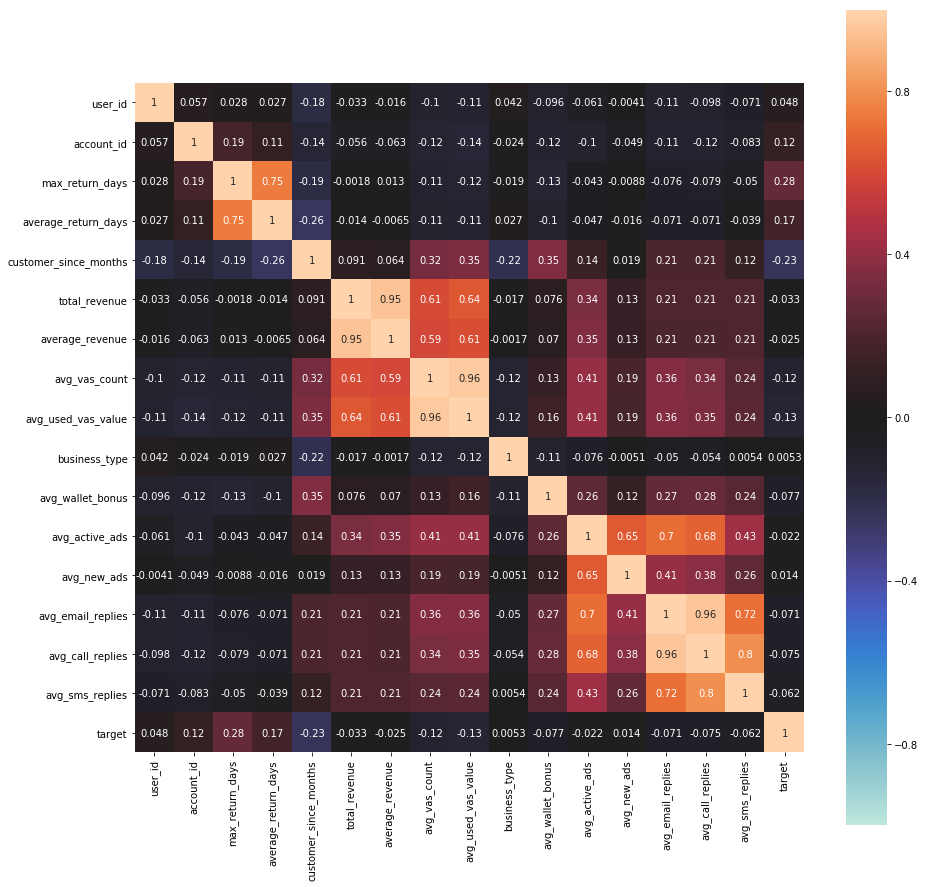

In [6]:
plt.figure(figsize=(15,15))
ax = sbn.heatmap(corr, vmin=-1, vmax=1, center=0,annot = True,
    square=True)


In [7]:
from sklearn.model_selection import train_test_split
X = df.drop('target',axis = 1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)
dfX = df.drop('target',axis = 1)
dfy = df['target']

In [11]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

xgb_classifier = xgb.XGBClassifier(max_depth=2, n_jobs=-1, learning_rate=0.2, n_estimators = 500)
xgb_classifier.fit(X_train,y_train)
pred_testset = xgb_classifier.predict(X_test)
accuracy_int_test = accuracy_score(y_test,pred_testset)                                    
print('accuracy on test set = ',accuracy_int_test*100)

accuracy on test set =  90.47186932849365
